# Fully developed baroclinic instability of a 3-layer flow

In [1]:
import numpy as np
from numpy import pi
from matplotlib import pyplot as plt
%matplotlib inline

import pyqg

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 28 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 28 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 28 days


# Set up

In [2]:
L =  1000.e3     # length scale of box    [m]
Ld = 15.e3       # deformation scale      [m]
kd = 1./Ld       # deformation wavenumber [m^-1]
Nx = 64          # number of grid points

H1 = 500.        # layer 1 thickness  [m]
H2 = 1750.       # layer 2 
H3 = 1750.       # layer 3 

U1 = 0.05          # layer 1 zonal velocity [m/s]
U2 = 0.01         # layer 2
U3 = 0.00         # layer 3

rho1 = 1025.
rho2 = 1025.275
rho3 = 1025.640

rek = 1.e-7       # linear bottom drag coeff.  [s^-1]
f0  = 0.0001236812857687059 # coriolis param [s^-1]
beta = 1.2130692965249345e-11 # planetary vorticity gradient [m^-1 s^-1]

Ti = Ld/(abs(U1))  # estimate of most unstable e-folding time scale [s]
dt = Ti/500.   # time-step [s]
tmax = 300*Ti      # simulation time [s]

In [3]:
m = pyqg.LayeredModel(nx=Nx, nz=3, U = [U1,U2,U3],V = [0.,0.,0.],L=L,f=f0,beta=beta,
                         H = [H1,H2,H3], rho=[rho1,rho2,rho3],rek=rek,
                        dt=dt,tmax=tmax, twrite=5000, tavestart=Ti*300)

2015-10-25 20:32:06,613 - pyqg.model - INFO -  Logger initialized
2015-10-25 20:32:06,670 - pyqg.model - INFO -  Kernel initialized


# Initial condition

In [4]:
sig = 1.e-7
qi = sig*np.vstack([np.random.randn(m.nx,m.ny)[np.newaxis,],
                    np.random.randn(m.nx,m.ny)[np.newaxis,],
                    np.random.randn(m.nx,m.ny)[np.newaxis,]])
m.set_q(qi)

# Run the model

In [5]:
m.run()

2015-10-25 20:32:46,444 - pyqg.model - INFO -  Step: 5000, Time: 3.000000e+06, KE: 7.839139e-07, CFL: 0.002084
2015-10-25 20:32:53,352 - pyqg.model - INFO -  Step: 10000, Time: 6.000000e+06, KE: 1.439857e-05, CFL: 0.002605
2015-10-25 20:33:00,359 - pyqg.model - INFO -  Step: 15000, Time: 9.000000e+06, KE: 3.883976e-04, CFL: 0.006931
2015-10-25 20:33:07,893 - pyqg.model - INFO -  Step: 20000, Time: 1.200000e+07, KE: 3.122142e-03, CFL: 0.017894
2015-10-25 20:33:15,486 - pyqg.model - INFO -  Step: 25000, Time: 1.500000e+07, KE: 7.713469e-03, CFL: 0.025531
2015-10-25 20:33:22,629 - pyqg.model - INFO -  Step: 30000, Time: 1.800000e+07, KE: 1.491686e-02, CFL: 0.032567
2015-10-25 20:33:29,571 - pyqg.model - INFO -  Step: 35000, Time: 2.100000e+07, KE: 3.278798e-02, CFL: 0.049253
2015-10-25 20:33:36,833 - pyqg.model - INFO -  Step: 40000, Time: 2.400000e+07, KE: 5.972034e-02, CFL: 0.073931
2015-10-25 20:33:44,503 - pyqg.model - INFO -  Step: 45000, Time: 2.700000e+07, KE: 1.055305e-01, CFL: 0.

# A snapshot and some diagnostics

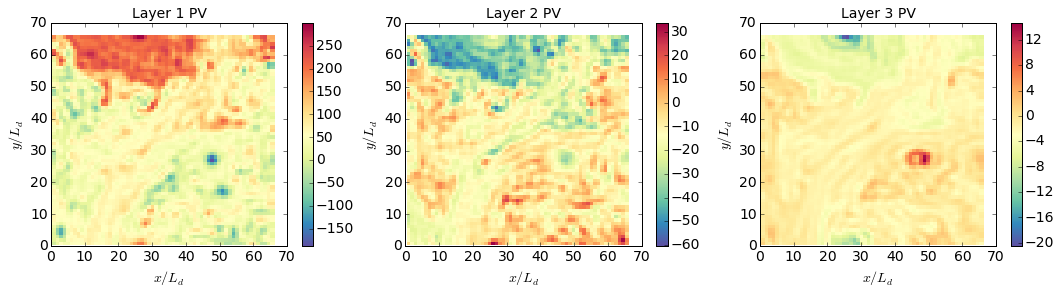

In [7]:
plt.figure(figsize=(18,4))

plt.subplot(131)
plt.pcolormesh(m.x/m.rd,m.y/m.rd,(m.q[0,]+m.Qy[0]*m.y)/(U1/Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('Layer 1 PV')

plt.subplot(132)
plt.pcolormesh(m.x/m.rd,m.y/m.rd,(m.q[1,]+m.Qy[1]*m.y)/(U1/Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('Layer 2 PV')

plt.subplot(133)
plt.pcolormesh(m.x/m.rd,m.y/m.rd,(m.q[2,]+m.Qy[2]*m.y)/(U1/Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('Layer 3 PV')

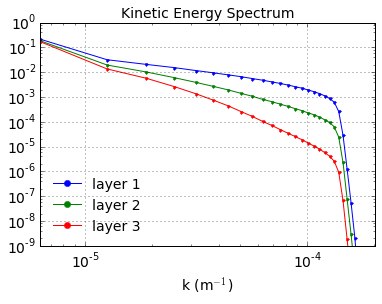

In [12]:
kespec_1 = m.get_diagnostic('KEspec')[0].sum(axis=0)
kespec_2 = m.get_diagnostic('KEspec')[1].sum(axis=0)
kespec_3 = m.get_diagnostic('KEspec')[2].sum(axis=0)


plt.loglog( m.kk, kespec_1, '.-' )
plt.loglog( m.kk, kespec_2, '.-' )
plt.loglog( m.kk, kespec_3, '.-' )

plt.legend(['layer 1','layer 2', 'layer 3'], loc='lower left')
plt.ylim([1e-9,1e-0]); plt.xlim([m.kk.min(), m.kk.max()])
plt.xlabel(r'k (m$^{-1}$)'); plt.grid()
plt.title('Kinetic Energy Spectrum');

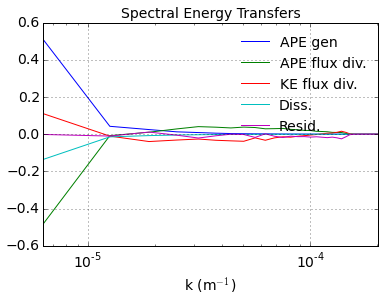

In [19]:
ebud = [ m.get_diagnostic('APEgenspec').sum(axis=0),
         m.get_diagnostic('APEflux').sum(axis=0),
         m.get_diagnostic('KEflux').sum(axis=0),
         -m.rek*(m.Hi[-1]/m.H)*m.get_diagnostic('KEspec')[1].sum(axis=0)*m.M**2 ]
ebud.append(-np.vstack(ebud).sum(axis=0))
ebud_labels = ['APE gen','APE flux div.','KE flux div.','Diss.','Resid.']
[plt.semilogx(m.kk, term) for term in ebud]
plt.legend(ebud_labels, loc='upper right')
plt.xlim([m.kk.min(), m.kk.max()])
plt.xlabel(r'k (m$^{-1}$)'); plt.grid()
plt.title('Spectral Energy Transfers');


This simple example illustrate the classic phenomenology of baroclinic turbulence. The APE generated through baroclinic instability is fluxed towards deformation length scales, where it is converted into KE. The KE the  experiments and inverse cascade. The mechanical bottom drag essentially removes the large scale KE.  